### 目录
#### 1. 了解数据
##### 1.1 导入数据
##### 1.2 可视化数据
#### 2. 数据清洗
##### 2.1 缺失值处理
##### 2.2 异常值处理
##### 2.3 去除重复的数据
##### 2.4 噪音数据的处理
#### 3. 特征提取
##### 3.1 主成分分析 （PCA）
##### 3.2 线性判别分析法（LDA）
#### 4. 划分训练集/验证集
##### 4.1 归一化
##### 4.2 划分训练集/验证集
#### 5. 定义评估方法
#### 6. 构建神经网络
##### 6.1 训练模型
#### 7. 利用测试集评估学习结果

---

#### 1. 可视化数据
##### 1.1 导入数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Seperate the features and target value from the train.csv
# features 十三维的特征
# 目标值是房价： prices
data = pd.read_csv('../Row_Data/train.csv')
features = data.drop('medv', axis = 1)
prices = data['medv']
data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [2]:
#目标：计算房价的最小值
minimum_price = min(prices)

#目标：计算房价的最大值
maximum_price = max(prices)

#目标：计算房价的平均值
mean_price = np.mean(prices)

#目标：计算房价的中值
median_price = np.median(prices)

#目标：计算房价的标准差
std_price = np.std(prices)

#目标：输出计算的结果
print("Statistics for Boston housing dataset:")
print("Minimum price: \t$", minimum_price)
print("Maximum price: \t$", maximum_price)
print("Mean price: \t$", mean_price)
print("Median price: \t$", median_price)
print("Standard deviation of prices: \t$", std_price)

Statistics for Boston housing dataset:
Minimum price: 	$ 5.0
Maximum price: 	$ 50.0
Mean price: 	$ 22.76876876876877
Median price: 	$ 21.6
Standard deviation of prices: 	$ 9.159683694919632


In [3]:
features.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43


##### 1.2 先随便挑选几个特征来可视化 

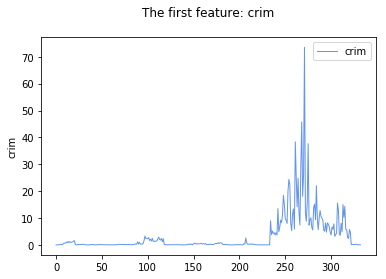

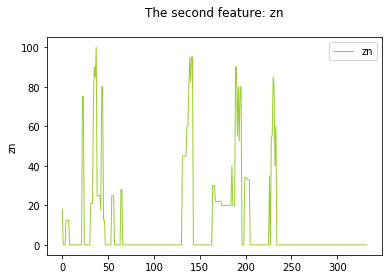

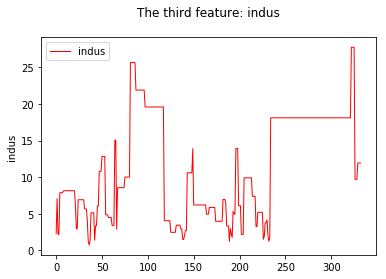

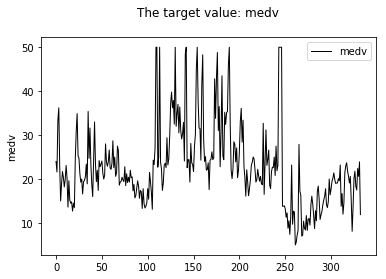

In [4]:
# 画出 features.crim 图像
plt.figure()
plt.plot(features.crim, color="cornflowerblue", label="crim", linewidth=1)
plt.ylabel("crim")
plt.title("The first feature: crim\n")
plt.legend()
plt.show()

# 画出 features.zn 图像
plt.figure()
plt.plot(features.zn, color="yellowgreen", label="zn", linewidth=1)
plt.ylabel("zn")
plt.title("The second feature: zn\n")
plt.legend()
plt.show()

# 画出 features.indus 图像
plt.figure()
plt.plot(features.indus, color="red", label="indus", linewidth=1)
plt.ylabel("indus")
plt.title("The third feature: indus\n")
plt.legend()
plt.show()

# 画出 values 图像
plt.figure()
plt.plot(prices, color="black", label="medv", linewidth=1)
plt.ylabel("medv")
plt.title("The target value: medv\n")
plt.legend()
plt.show()

#### 2. 数据清洗
##### 2.1 缺失值处理

In [5]:
# 缺失值处理




##### 2.2 异常值处理

In [6]:
# 异常值处理




##### 2.3 去除重复的数据

In [7]:
# 去除重复的数据




##### 2.4 噪音数据的处理

In [8]:
# 噪音数据的处理




#### 3. 特征提取
##### 3.1 主成分分析 （PCA）

In [11]:
# PCA




##### 3.2 线性判别分析法（LDA）

In [12]:
# LDA




#### 4. 划分训练集/验证集
##### 4.1 归一化

#### 因为各个 feature 的取值范围区别较大，所以用 minmax_normalization 对数据进行归一化.
#### 这样可以把每个 feature 都压缩到 0-1 的范围.                               
#### 常用的最小最大规范化方法：
$$\hat x = {\frac{x - min(x)}{max(x) - min(x)}}$$

In [22]:
# 自定义一个最小最大规范化的函数
def minmax_normalization(data):
    xs_max = np.max(data, axis=0)
    xs_min = np.min(data, axis=0)
    xs = (1 - 0) * (data - xs_min) / (xs_max - xs_min) + 0
    return xs

In [23]:
# 将 data 传入上面的规范化函数 
# 规范化得到的数据存放在 m_n_data 中
m_n_data = minmax_normalization(data);
m_n_data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.000000,0.000000,0.180,0.058148,0.0,0.314815,0.583656,0.629787,0.308996,0.000000,0.206501,0.313953,1.000000,0.089680,0.422222
1,0.001980,0.000285,0.000,0.234444,0.0,0.172840,0.553834,0.775532,0.400545,0.043478,0.103250,0.604651,1.000000,0.204470,0.368889
2,0.005941,0.000354,0.000,0.053333,0.0,0.150206,0.665569,0.423404,0.514848,0.086957,0.065010,0.709302,0.994230,0.033389,0.631111
3,0.007921,0.000853,0.000,0.053333,0.0,0.150206,0.694423,0.512766,0.514848,0.086957,0.065010,0.709302,1.000000,0.099338,0.693333
4,0.011881,0.001115,0.125,0.264074,0.0,0.286008,0.474632,0.644681,0.462482,0.173913,0.235182,0.302326,0.996695,0.295254,0.397778


##### 4.2 划分训练集/验证集

#### 分割比例为：80%的数据用于训练，20%用于测试 test_size = 0.2
#### 将数据集分成训练集和测试集的好处：既可以用于训练又可以用于测试，而且不会相互干扰，而且可以对训练模型进行有效的验证。

In [27]:
m_n_features = m_n_data.drop('medv', axis = 1)
m_n_prices = m_n_data['medv']

In [29]:
# Split the dataset as traing set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(m_n_features, m_n_prices, test_size = 0.2, random_state = 1) # random_state=1:不会随机划分
X_train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
298,0.908911,0.092412,0.0,0.642963,0.0,0.674897,0.487994,0.834043,0.165739,1.000000,0.913958,0.883721,1.000000,0.357892
162,0.465347,0.004408,0.0,0.202222,0.0,0.251029,0.488962,0.590426,0.263269,0.304348,0.227533,0.558140,0.948780,0.252483
175,0.516832,0.007178,0.2,0.119630,0.0,0.539095,0.766654,0.887234,0.105441,0.173913,0.145315,0.046512,0.978317,0.152594
161,0.463366,0.006006,0.0,0.202222,1.0,0.251029,0.612897,0.643617,0.263269,0.304348,0.227533,0.558140,0.906711,0.174393
14,0.041584,0.011502,0.0,0.274074,0.0,0.314815,0.465531,0.885106,0.300886,0.130435,0.227533,0.976744,0.988892,0.333885


#### 5. 定义评估方法

#### $SSE$ (最小化误差平方和 Sum of Squares for Error): $$SSE = {\sum_{k=1}^n (y_i - \hat y_i)^2}$$
+ 其中：$n$ 是数据的条数
#### $MSE$ (均方误差 Mean Squared Error): $$MSE = {\frac{1} {n}}{\sum_{k=1}^n (y_i - \hat y_i)^2}$$
+ $MSE$ 越接近 0 模型的性能越好，但是不全面
#### 残差平方和公式: $$R^2(y, \hat y) = {\frac{\sum_{k=1}^n (y_i - \hat y_i)^2}{\sum_{k=1}^n (y_i - \overline y)^2}}$$
+ 模型越好：$$R^2(y, \hat y)→1$$
+ 模型越差：$$R^2(y, \hat y)→0$$

In [13]:
# 自定义一个返回最终残差和的函数
from sklearn.metrics import r2_score
def performance_metric(y_true,y_predict):
    '''计算实际值与预测值的R2分数'''
    score = r2_score(y_true,y_predict)
    return score

#### 6. 构建神经网络
##### 6.1 训练模型

In [14]:
# DNN 




#### 7. 利用测试集评估学习结果

In [15]:
# Evalution


